In [1]:
import pandas as pd

df = pd.read_csv('../../datasets/insurance_train.csv')
print(df)

     age     sex     bmi  children smoker     region      charges
0     26    male  27.060         0    yes  southeast  17043.34140
1     58    male  36.955         2    yes  northwest  47496.49445
2     20  female  24.420         0    yes  southeast  26125.67477
3     51  female  38.060         0    yes  southeast  44400.40640
4     62  female  25.000         0     no  southwest  13451.12200
..   ...     ...     ...       ...    ...        ...          ...
333   25  female  22.515         1     no  northwest   3594.17085
334   18    male  53.130         0     no  southeast   1163.46270
335   64    male  37.905         0     no  northwest  14210.53595
336   54  female  47.410         0    yes  southeast  63770.42801
337   28  female  25.800         0     no  southwest   3161.45400

[338 rows x 7 columns]


# 1. Подготовка данных
## 1. проверить наличие пропусков

In [2]:
print("Количество пропусков в столбце:")
print(df.isnull().sum())

print("\nПроцент пропусков в каждом столбце:")
print((df.isnull().mean() * 100).round(2))

print("\nЕсть ли пропуски:", df.isnull().values.any())

Количество пропусков в столбце:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Процент пропусков в каждом столбце:
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Есть ли пропуски: False


## 1. проверить наличие выбросов
### Метод IQR (интерквартильный размах)
Поскольку выбросы определяются только для числовых данных, выберем такие столбцы:

In [3]:
numeric_cols = ["age", "bmi", "children", "charges"]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    count_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    print(f"{col}: выбросов = {count_outliers}")

age: выбросов = 0
bmi: выбросов = 5
children: выбросов = 0
charges: выбросов = 19


## 2. привести категориальные признаки к числовым

In [4]:
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=False)
print(df_encoded)

     age     sex     bmi  children smoker      charges  region_northeast  \
0     26    male  27.060         0    yes  17043.34140             False   
1     58    male  36.955         2    yes  47496.49445             False   
2     20  female  24.420         0    yes  26125.67477             False   
3     51  female  38.060         0    yes  44400.40640             False   
4     62  female  25.000         0     no  13451.12200             False   
..   ...     ...     ...       ...    ...          ...               ...   
333   25  female  22.515         1     no   3594.17085             False   
334   18    male  53.130         0     no   1163.46270             False   
335   64    male  37.905         0     no  14210.53595             False   
336   54  female  47.410         0    yes  63770.42801             False   
337   28  female  25.800         0     no   3161.45400             False   

     region_northwest  region_southeast  region_southwest  
0               False      

#### Приведем бинарные признаки к числовым

In [5]:
df_transformed = df_encoded
df_transformed['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_transformed['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
print(df_transformed)

     age  sex     bmi  children  smoker      charges  region_northeast  \
0     26    1  27.060         0       1  17043.34140             False   
1     58    1  36.955         2       1  47496.49445             False   
2     20    0  24.420         0       1  26125.67477             False   
3     51    0  38.060         0       1  44400.40640             False   
4     62    0  25.000         0       0  13451.12200             False   
..   ...  ...     ...       ...     ...          ...               ...   
333   25    0  22.515         1       0   3594.17085             False   
334   18    1  53.130         0       0   1163.46270             False   
335   64    1  37.905         0       0  14210.53595             False   
336   54    0  47.410         0       1  63770.42801             False   
337   28    0  25.800         0       0   3161.45400             False   

     region_northwest  region_southeast  region_southwest  
0               False              True            

## 3. вычислить парные корреляции признаков

In [6]:
correlation_matrix = df_transformed.corr()
print(correlation_matrix)

                       age       sex       bmi      children        smoker  \
age               1.000000 -0.046393  0.079096  5.392529e-02  1.019429e-02   
sex              -0.046393  1.000000  0.037125 -5.297014e-03  1.178561e-01   
bmi               0.079096  0.037125  1.000000  6.306955e-02  4.963140e-02   
children          0.053925 -0.005297  0.063070  1.000000e+00 -3.723097e-17   
smoker            0.010194  0.117856  0.049631 -3.723097e-17  1.000000e+00   
charges           0.298395  0.060221  0.219566  6.944380e-02  7.835189e-01   
region_northeast  0.051702  0.060514 -0.169994 -1.912188e-02  7.497846e-02   
region_northwest -0.069440 -0.037018 -0.190355 -2.490291e-02 -7.624929e-03   
region_southeast -0.050969  0.011451  0.347719  2.305945e-02 -8.237233e-03   
region_southwest  0.074101 -0.036513 -0.015443  1.946830e-02 -5.951683e-02   

                   charges  region_northeast  region_northwest  \
age               0.298395          0.051702         -0.069440   
sex      

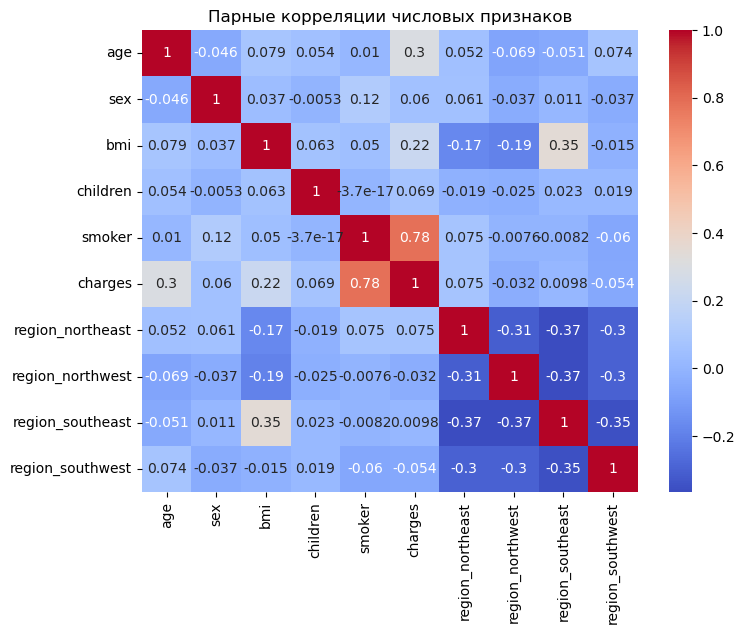

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Парные корреляции числовых признаков")
plt.show()

# 2. Многомерная линейная регрессия

Построить модель линейной регрессии и подобрать параметры:

## 1. аналитически

### Матрица объектов и признаков

* У нас есть **выборка** из $\ell$ объектов (строк) и $n$ признаков (столбцов).
* Матрица $X$ имеет размер $\ell \times n$: каждая строка — это объект, каждый столбец — признак.
* Среди признаков обычно есть **константа**, чтобы учесть свободный член (intercept).

### Вектор параметров

* $w$ — это **вектор коэффициентов** модели (размер $n \times 1$), по одному на каждый признак.

### Модель

$$
f(x, w) = \sum_{i=1}^{n} w_i x_i = Xw
$$

* $f(x, w)$ — предсказание модели для объекта $x$.
* В **матричной форме** $Xw$ даёт сразу все предсказания для всех объектов.

## Функционал потерь

$$
Q(w) = \sum_{i=1}^{\ell} (f(x_i, w) - y_i)^2 = ||Xw - y||^2 \rightarrow \min_w
$$

* Это **сумма квадратов ошибок (MSE)**.
* Цель: подобрать $w$, чтобы **минимизировать разницу между предсказанными и реальными значениями** $y_i$.

## Градиент функционала потерь

$$
\frac{\partial Q}{\partial w} = 2X^T(Xw - y)
$$

* **Градиент** — это вектор частных производных по каждому параметру $w_i$.
* Он показывает, **в каком направлении функционал потерь растёт быстрее всего**.
* Чтобы минимизировать функцию, идём **в направлении -градиента**.

## Аналитическое решение

Для **точного решения**:

$$
2X^T(Xw - y) = 0 \implies X^TXw = X^Ty \implies w^* = (X^TX)^{-1} X^Ty
$$

* $w^*$ — **коэффициенты, которые минимизируют ошибку MSE**.

### Проблемы с аналитическим решением

1. **Матрица $X^TX$ вырождена (необратима)**

   * Например, признаки сильно коррелированы.
   * Тогда $(X^TX)^{-1}$ не существует.

В таких случаях используют **численные методы**, например градиентный спуск.

In [8]:
import numpy as np

X = df_transformed[['age', 'sex', 'bmi', 'children', 'smoker',
                    'region_northwest', 'region_southeast', 'region_southwest']]
X.insert(0, 'intercept', 1)

y = df_transformed['charges']

X_np = X.values.astype(float)
y_np = y.values.reshape(-1, 1).astype(float)

XTX = X_np.T @ X_np
det = np.linalg.det(XTX)
print("Определитель X^T X:", det)

w_analytic = np.linalg.inv(XTX) @ X_np.T @ y_np

print("Коэффициенты модели (аналитическое решение):")
for col, coef in zip(X.columns, w_analytic.flatten()):
    print(f"{col}: {coef:.2f}")

Определитель X^T X: 8.42614397725322e+22
Коэффициенты модели (аналитическое решение):
intercept: -11458.01
age: 256.71
sex: -655.41
bmi: 350.86
children: 483.10
smoker: 23401.99
region_northwest: -200.59
region_southeast: -1389.90
region_southwest: -1440.51


## 2. численно, с помощью методов градиентного спуска


## Численное решение

Подобные оптимизационные задачи (например, минимизация функции потерь в линейной регрессии) **решаются итерационно с помощью градиентных методов**.

Основная идея:

1. Мы начинаем с **начального приближения** $w^{(0)}$ в пространстве параметров модели.
2. В каждой точке **вычисляем градиент** функции потерь:

$$
\nabla Q(w) = \frac{\partial Q}{\partial w}
$$

* Градиент указывает направление **наискорейшего роста функции**.
* Так как мы хотим **минимизировать функцию**, идём в направлении **минус градиент**.

3. Размер шага определяется комбинацией **значения градиента** и **параметра обучения** $\lambda$.

## Градиентные методы

### Метод градиентного спуска (Gradient Descent)

* Классический метод для минимизации функций.

Итеративная формула:

$$
w^{(k+1)} = w^{(k)} - \lambda \cdot \frac{\partial Q}{\partial w} \Big|_{w=w^{(k)}}
$$

где:

* $w^{(0)}$ — начальное приближение параметров
* $\lambda$ — шаг градиента (learning rate)
* $k$ — номер итерации

**Критерии остановки:**

1. Градиент близок к нулю: $|\nabla Q(w^{(k)})| \approx 0$
2. Изменение параметров мало: $|w^{(k+1)} - w^{(k)}| \approx 0$
3. Достигнуто ограничительное число итераций

In [9]:
lambda_ = 1e-7       
epsilon = 1e-6        
max_iter = 5_000_000 

w_numeric = np.zeros((X_np.shape[1], 1))

for i in range(max_iter):
    grad = 2 * X_np.T @ (X_np @ w_numeric - y_np)
    
    w_new = w_numeric - lambda_ * grad
    
    if np.linalg.norm(grad) < epsilon or np.linalg.norm(w_new - w_numeric) < epsilon:
        print(f"Остановка на итерации {i}")
        break
    
    w_numeric = w_new

print("\nКоэффициенты модели (численное решение):")
for col, coef in zip(X.columns, w_numeric.flatten()):
    print(f"{col}: {coef:.2f}")


Коэффициенты модели (численное решение):
intercept: -11456.59
age: 256.70
sex: -655.50
bmi: 350.84
children: 483.09
smoker: 23401.96
region_northwest: -200.89
region_southeast: -1390.00
region_southwest: -1440.72


### Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)

Идея: **не вычислять градиент на всей выборке** $X$ (размер $\ell$), а на её **случайной подвыборке** $\tilde{X} \subset X$, где размер $\tilde{\ell} < \ell$.

Градиент оценивается как:

$$
\tilde{\nabla} Q(w^{(k)}) \approx \frac{\partial Q}{\partial w} \Big|_{\tilde{X}}
$$

Обновление параметров:

$$
w^{(k+1)} = w^{(k)} - \lambda \cdot \tilde{\nabla} Q(w^{(k)})
$$

**Преимущества по сравнению с классическим градиентным спуском:**

1. **Быстрее** на больших данных, так как не нужно проходить всю выборку.
2. **Меньше памяти**, требуется хранить только батч.

In [10]:
lambda_ = 1e-7        
epsilon = 1e-6       
max_iter = 5_000_000 

w_stochastic = np.zeros((X_np.shape[1], 1))

n = len(y_np)
batch_size = 100

for i in range(max_iter):
    idx = np.random.choice(n, batch_size, replace=False)
    X_batch = X_np[idx]
    y_batch = y_np[idx]
    
    grad = 2 * X_batch.T @ (X_batch @ w_stochastic - y_batch)

    w_new = w_stochastic - lambda_ * grad

    if np.linalg.norm(grad) < epsilon or np.linalg.norm(w_new - w_stochastic) < epsilon:
        print(f"Остановка на итерации {i}")
        break

    w_stochastic = w_new

for col, coef in zip(X.columns, w_stochastic.flatten()):
    print(f"{col}: {coef:.2f}")

intercept: -10691.59
age: 249.02
sex: -707.73
bmi: 338.33
children: 474.51
smoker: 23383.66
region_northwest: -356.47
region_southeast: -1445.14
region_southwest: -1548.17


# 3. Добавление регуляризации
## Регуляризация

В случае сильной корреляции между признаками (столбцами матрицы $X$), обращение матрицы $(X^TX)^{-1}$ ведет к увеличению её абсолютных значений (а в случае полной линейной зависимости — вообще необратимости), и в результате веса модели становятся большими по модулю и неустойчивыми.
Бороться с этим эффектом можно с помощью регуляризации. В функционал ошибки добавляют слагаемое, пропорциональное норме весов. Таким образом можно получить различные модификации регрессионной модели.

**Гребневая регрессия**
$$
Q_{L_2}(w) = ||Xw - y||^2 + \alpha ||w||_2^2 \rightarrow \min_{w}
$$

$$
||a||_2 = \sqrt{\sum_{i=1}^{n} a_i^2}
$$

Имеет аналитическое решение
$$
w^* = (X^TX + \alpha I)^{-1}X^Ty
$$
где $I$ — единичная матрица

In [11]:
alpha = 0.1
I = np.eye(X_np.shape[1])

w_ridge_analytic = np.linalg.inv(XTX + alpha * I) @ X_np.T @ y_np

print("\nКоэффициенты модели (с регуляризацией, аналитическое решение):")
for col, coef in zip(X.columns, w_ridge_analytic.flatten()):
    print(f"{col}: {coef:.4f}")


Коэффициенты модели (с регуляризацией, аналитическое решение):
intercept: -11335.1522
age: 256.1040
sex: -657.8306
bmi: 348.3233
children: 481.4559
smoker: 23360.5372
region_northwest: -215.8754
region_southeast: -1389.4835
region_southwest: -1448.5119


**Градиент**
$$
\frac{\partial Q_{L_2}}{\partial w} = 2 X^T (Xw - y) + 2 \alpha w
$$

In [12]:
lambda_ = 1e-7        
epsilon = 1e-6        
max_iter = 5_000_000

w_ridge_numeric = np.zeros((X_np.shape[1], 1))

for i in range(max_iter):
    grad = 2 * X_np.T @ (X_np @ w_ridge_numeric - y_np) + 2 * alpha * w_ridge_numeric
    
    w_new = w_ridge_numeric - lambda_ * grad
    
    if np.linalg.norm(grad) < epsilon or np.linalg.norm(w_new - w_ridge_numeric) < epsilon:
        print(f"Остановка на итерации {i}")
        break
    
    w_ridge_numeric = w_new

print("\nКоэффициенты модели (с регуляризацией, численное решение):")
for col, coef in zip(X.columns, w_ridge_numeric.flatten()):
    print(f"{col}: {coef:.2f}")


Коэффициенты модели (с регуляризацией, численное решение):
intercept: -11333.88
age: 256.10
sex: -657.92
bmi: 348.30
children: 481.44
smoker: 23360.51
region_northwest: -216.14
region_southeast: -1389.58
region_southwest: -1448.70


# 4. Оценка обобщающей способности

In [13]:
import pandas as pd
import numpy as np

df_test = pd.read_csv('../../datasets/insurance_test.csv')
df_test = pd.get_dummies(df_test, columns=['region'], drop_first=False)
df_test['sex'] = df_test['sex'].map({'male': 1, 'female': 0})
df_test['smoker'] = df_test['smoker'].map({'yes': 1, 'no': 0})

X_test = df_test[['age', 'sex', 'bmi', 'children', 'smoker', 
                  'region_northwest', 'region_southeast', 'region_southwest']]
X_test.insert(0, 'intercept', 1)
y_test = df_test['charges'].values.reshape(-1, 1).astype(float)
X_test_np = X_test.values.astype(float)


y_pred_const = np.mean(y_np)
mse_const = np.mean((y_test - y_pred_const) ** 2)


y_pred_linear_analytic = X_test_np @ w_analytic
mse_linear_analytic = np.mean((y_test - y_pred_linear_analytic) ** 2)


y_pred_linear_numeric = X_test_np @ w_numeric
mse_linear_numeric = np.mean((y_test - y_pred_linear_numeric) ** 2)


y_pred_linear_stochastic = X_test_np @ w_stochastic
mse_linear_stochastic = np.mean((y_test - y_pred_linear_stochastic) ** 2)


y_pred_ridge_analytic = X_test_np @ w_ridge_analytic
mse_ridge_analytic = np.mean((y_test - y_pred_ridge_analytic) ** 2)


y_pred_ridge_numeric = X_test_np @ w_ridge_numeric
mse_ridge_numeric = np.mean((y_test - y_pred_ridge_numeric) ** 2)


print("MSE на тестовой выборке:")
print(f"Константная модель: {mse_const:,.2f}")
print(f"Линейная регрессия (аналитическая): {mse_linear_analytic:,.2f}")
print(f"Линейная регрессия (градиентый спуск): {mse_linear_numeric:,.2f}")
print(f"Линейная регрессия (стохастический градиентый спуск): {mse_linear_stochastic:,.2f}")
print(f"Ridge (аналитическая): {mse_ridge_analytic:,.2f}")
print(f"Ridge (градиентый спуск): {mse_ridge_numeric:,.2f}")

MSE на тестовой выборке:
Константная модель: 141,830,094.36
Линейная регрессия (аналитическая): 34,216,008.76
Линейная регрессия (градиентый спуск): 34,216,061.85
Линейная регрессия (стохастический градиентый спуск): 34,220,927.79
Ridge (аналитическая): 34,227,584.33
Ridge (градиентый спуск): 34,227,640.38
